<h1>Candidate task</h1>

<a>https://github.com/ruoyan-li/Cutaneous-T-cell-lymphoma-study/tree/main/code_final</a><br>
<a>https://github.com/Teichlab/lung-immune-cell-atlas/tree/main/Integration_with_pan_fetal/notebooks</a><br>
<a>https://chatgpt.com/</a><br>

<h2>1. Environment setup and data</h2>

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

adata=sc.read('/lustre/scratch127/casm/team294rr/ty2/SSC/analysis/expression/lung-de/single_cell.h5ad')
adata

AnnData object with n_obs × n_vars = 80749 × 44583
    obs: 'donor_id', 'study', 'disease', 'cell_type', 'cell_type_broad'
    var: 'gene_name', 'gene_id'

In [2]:
adata.obs["disease"].value_counts()

disease
pulmonary_fibrosis    42796
control               37953
Name: count, dtype: int64

In [3]:
# Group by disease condition and cell type, then count occurrences
cell_type_counts = adata.obs.groupby(["disease", "cell_type"]).size().unstack().T
cell_type_counts.columns = ["Control", "IPF"]

# Add a new column for the total count across both conditions
cell_type_counts["Total"] = cell_type_counts["Control"] + cell_type_counts["IPF"]
cell_type_counts = cell_type_counts.sort_values(by="Total", ascending=False)

# Display the result
print(cell_type_counts)

                               Control    IPF  Total
cell_type                                           
Multiciliated (non-nasal)         3567  10790  14357
AT2                              10944   3028  13972
Alveolar macrophages              5779   5172  10951
Monocyte-derived Mph              1218   3101   4319
Goblet (subsegmental)                3   3037   3040
CD4 T cells                       1536   1236   2772
CD8 T cells                       1519    670   2189
pre-TB secretory                  1230    871   2101
EC arterial                        896   1203   2099
Non-classical monocytes            829   1218   2047
Classical monocytes               1344    643   1987
AT1                               1586    165   1751
Lymphatic EC mature               1151    518   1669
DC2                                391   1258   1649
EC venous pulmonary               1089    208   1297
Alveolar Mph MT-positive             7   1183   1190
Adventitial fibroblasts            711    302 

<h2>2.1. Sample quality</h2>

In [4]:
# Identify mitochondrial genes (assuming human data with "MT-" prefix)
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# Compute QC metrics, including mitochondrial gene percentage
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

adata.obs

,donor_id,study,disease,cell_type,cell_type_broad,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
GGCTGGTTCTTAACCT_F01851,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,control,Lymphatic EC mature,Lymphatic EC,744,1285.0,0.0,0.0
ILD60-2_ACGAGGAAGCCAGAAC_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,Multiciliated (non-nasal),Airway epithelium,3122,8231.0,0.0,0.0
ILD59-2_CATGCCTTCCGTTGTC_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,Lymphatic EC mature,Lymphatic EC,1268,2826.0,0.0,0.0
ILD61-1_AGGGAGTTCCGCTGTT_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,AT2,Alveolar epithelium,2555,6915.0,0.0,0.0
F01379_GGACGTCGTACACCGC_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,Multiciliated (non-nasal),Airway epithelium,1213,2038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
TATTACCGTGATGATA_HD67,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,control,DC2,Myeloid,1296,3965.0,0.0,0.0
ILD60-1_CCGGTAGAGCACAGGT_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,Classical monocytes,Myeloid,1248,3210.0,0.0,0.0
GTCGTAACAGCGATCC_F01851,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,control,AT2,Alveolar epithelium,981,3661.0,0.0,0.0
ILD59-2_TTGGCAAGTTCCCTTG_haberman,homosapiens_None_2023_None_sikkemalisa_002_d10...,Banovich_Kropski_2020,pulmonary_fibrosis,AT2,Alveolar epithelium,1804,4139.0,0.0,0.0


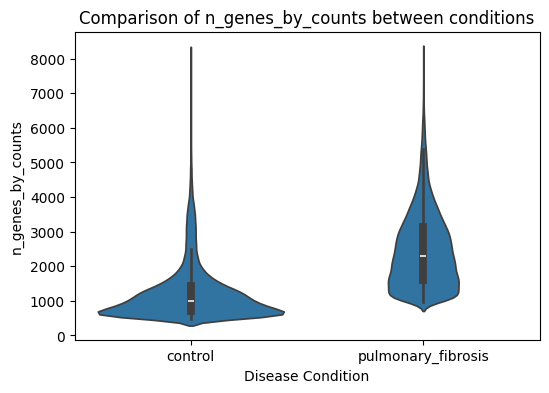

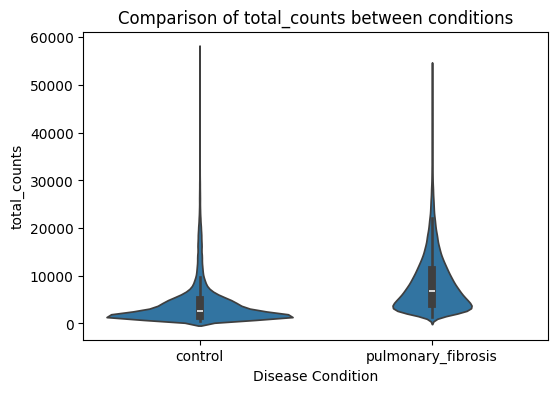

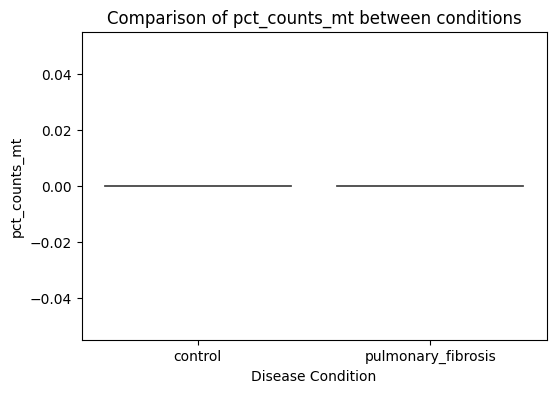

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots to compare metrics across conditions
metrics = ["n_genes_by_counts", "total_counts", "pct_counts_mt"]
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=adata.obs["disease"], y=adata.obs[metric])
    plt.title(f"Comparison of {metric} between conditions")
    plt.xlabel("Disease Condition")
    plt.ylabel(metric)
    plt.show()

<h2>2.2. Cell type composition changes</h2>

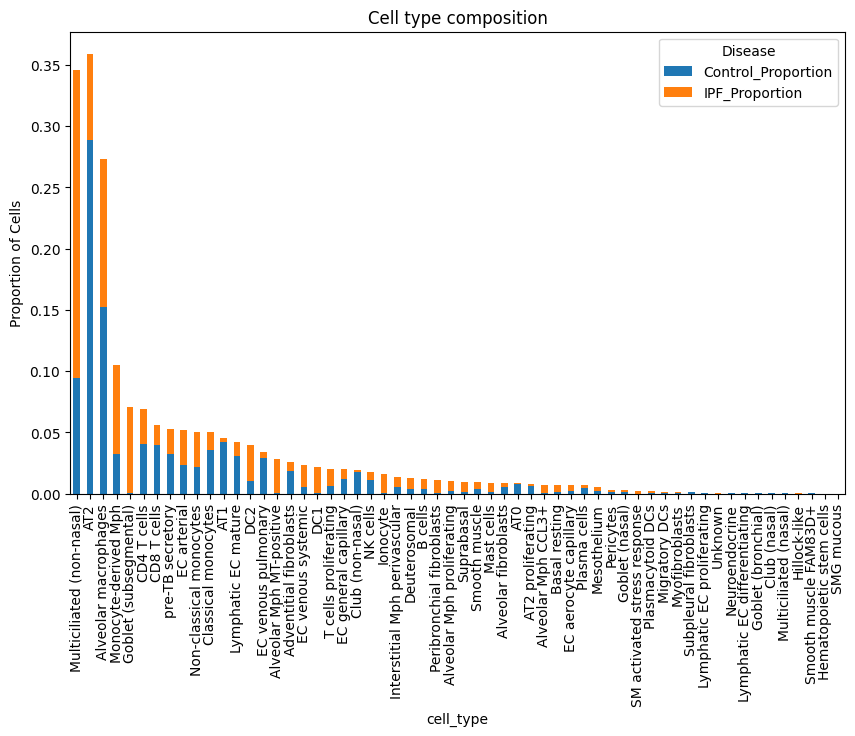

In [6]:
# Compute proportions per sample
df = cell_type_counts.copy()
df["Control_Proportion"] = df["Control"] / df["Control"].sum()
df["IPF_Proportion"] = df["IPF"] / df["IPF"].sum()

# Display only the proportion result
#print(df[["Control_Proportion", "IPF_Proportion"]])

# Plot the proportions
df[df.columns[-2:]].plot(kind="bar", stacked=True, figsize=(10, 6))
plt.ylabel("Proportion of Cells")
plt.title("Cell type composition")
plt.legend(title="Disease")
plt.show()

In [25]:
adata.obs["cell_type_broad"].value_counts()

cell_type_broad
Myeloid                     24862
Airway epithelium           22610
Alveolar epithelium         16031
Lymphoid                     7276
Blood vessels                5468
Fibroblast lineage           2041
Lymphatic EC                 1714
Smooth muscle                 501
Mesothelium                   213
Unknown                        30
Hematopoietic stem cells        2
Submucosal Gland                1
Name: count, dtype: int64

disease                        control  pulmonary_fibrosis
cell_type                                                 
AT0                                282                  37
AT1                                  0                   0
AT2                                  0                   0
AT2 proliferating                    0                   0
Adventitial fibroblasts              0                   0
Alveolar Mph CCL3+                   0                   0
Alveolar Mph MT-positive             0                   0
Alveolar Mph proliferating           0                   0
Alveolar fibroblasts                 0                   0
Alveolar macrophages                 0                   0
B cells                              0                   0
Basal resting                       55                 231
CD4 T cells                          0                   0
CD8 T cells                          0                   0
Classical monocytes                  0                  

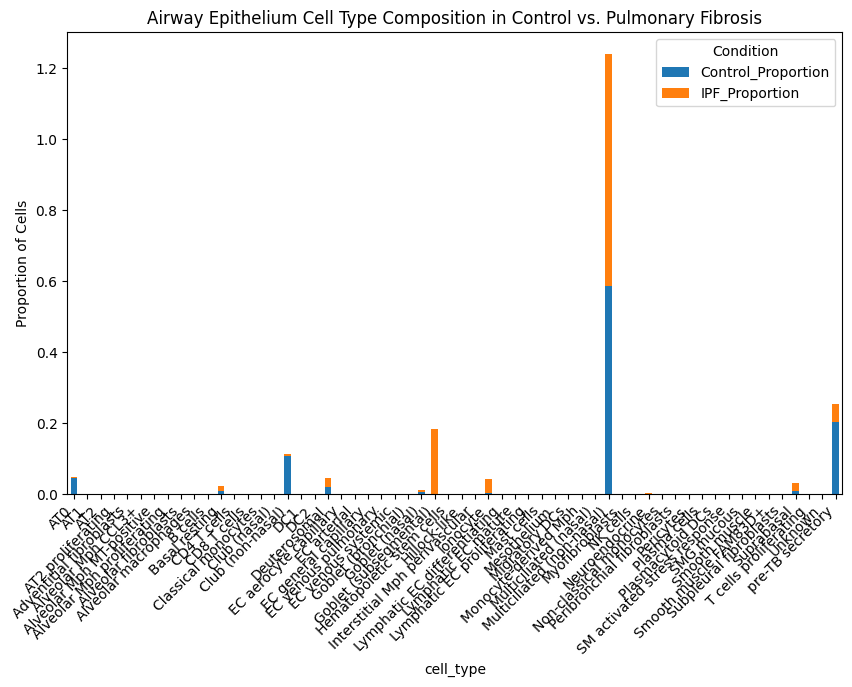

In [50]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# Group by disease condition, cell_type_broad, and cell_type, then count occurrences
cell_type_counts = adata.obs.groupby(["disease", "cell_type_broad", "cell_type"]).size().unstack().T

# Select only the "Airway epithelium" cell types from MultiIndex columns
airway_epithelium_counts = cell_type_counts.xs("Airway epithelium", axis=1, level="cell_type_broad")
# Remove rows where both "control" and "pulmonary_fibrosis" are 0
airway_epithelium_counts = airway_epithelium_counts[
    (airway_epithelium_counts["control"] != 0) | (airway_epithelium_counts["pulmonary_fibrosis"] != 0)
]
print(airway_epithelium_counts)

# Compute proportions per sample
df = airway_epithelium_counts.copy()
df["Control_Proportion"] = df["Control"] / df["Control"].sum()
df["IPF_Proportion"] = df["IPF"] / df["IPF"].sum()

# Plot the counts
df[df.columns[-2:]].plot(kind="bar", figsize=(10, 6), stacked=True)
plt.ylabel("Proportion of Cells")
plt.title("Airway Epithelium Cell Type Composition in Control vs. Pulmonary Fibrosis")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Condition")
plt.show()

In [7]:
# Filter rows where both Control and IPF counts are greater than 5
df_filtered = df[(df["Control"] > 5) & (df["IPF"] > 5)]

# Display the filtered dataframe
print(df_filtered.iloc[:, :2])

                               Control    IPF
cell_type                                    
Multiciliated (non-nasal)         3567  10790
AT2                              10944   3028
Alveolar macrophages              5779   5172
Monocyte-derived Mph              1218   3101
CD4 T cells                       1536   1236
CD8 T cells                       1519    670
pre-TB secretory                  1230    871
EC arterial                        896   1203
Non-classical monocytes            829   1218
Classical monocytes               1344    643
AT1                               1586    165
Lymphatic EC mature               1151    518
DC2                                391   1258
EC venous pulmonary               1089    208
Alveolar Mph MT-positive             7   1183
Adventitial fibroblasts            711    302
EC venous systemic                 195    792
DC1                                 10    918
T cells proliferating              227    611
EC general capillary              

In [8]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Function to apply chi-square test
def test_differential_abundance(row):
    contingency_table = [[row["Control"], row["IPF"]]]
    _, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return p_value

# Ensures it's a new DataFrame
df_filtered = df_filtered.copy()

# Compute p-values
df_filtered["p_value"] = df_filtered.apply(test_differential_abundance, axis=1)

# Apply FDR correction and assign values safely
df_filtered["adjusted_p_value"] = multipletests(df_filtered["p_value"], method="fdr_bh")[1]

# Sort by significance
df_filtered = df_filtered.sort_values(by="adjusted_p_value")

# Display significant results (p < 0.05)
df_significant = df_filtered[df_filtered["adjusted_p_value"] < 0.05]

# Print the results
print(df_significant)


Empty DataFrame
Columns: [Control, IPF, Total, Control_Proportion, IPF_Proportion, p_value, adjusted_p_value]
Index: []


In [9]:
# Group by cell type, disease, and donor to get donor-wise cell counts
cell_counts_per_donor = adata.obs.groupby(["cell_type", "disease", "donor_id"]).size().unstack(level=[1, 2], fill_value=0)
#print(cell_counts_per_donor)

# Remove donors that contribute 0 to all cell types
donor_sums = cell_counts_per_donor.sum(axis=0)  # Sum across all cell types per donor
valid_donors = donor_sums[donor_sums > 0].index  # Keep only donors with at least one non-zero entry
cell_counts_per_donor_filtered = cell_counts_per_donor[valid_donors]  # Filter out zero-contributing donors
#print(cell_counts_per_donor_filtered)

# Ensures it's a new DataFrame
cell_counts_per_donor_filtered = cell_counts_per_donor_filtered.copy()

# Convert donor-wise cell counts into comma-separated values
cell_counts_per_donor_filtered["Control_Cell_Counts"] = cell_counts_per_donor_filtered["control"].apply(lambda x: ",".join(map(str, x.values)), axis=1)
cell_counts_per_donor_filtered["IPF_Cell_Counts"] = cell_counts_per_donor_filtered["pulmonary_fibrosis"].apply(lambda x: ",".join(map(str, x.values)), axis=1)
#print(cell_counts_per_donor_filtered)

# Keep only the relevant columns
cell_counts_formatted = cell_counts_per_donor_filtered[["Control_Cell_Counts", "IPF_Cell_Counts"]]
print(cell_counts_formatted)

disease                        Control_Cell_Counts         IPF_Cell_Counts
donor_id                                                                  
cell_type                                                                 
AT0                                   132,28,98,24              7,5,6,6,13
AT1                                485,308,316,477            4,8,83,46,24
AT2                            1754,3245,1334,4611      34,79,2336,184,395
AT2 proliferating                     80,21,13,115            0,6,26,11,36
Adventitial fibroblasts             304,202,37,168           15,25,259,1,2
Alveolar Mph CCL3+                        6,3,6,16            1,41,210,4,9
Alveolar Mph MT-positive                   2,1,0,4      533,228,217,41,164
Alveolar Mph proliferating               27,7,3,43            2,10,330,9,2
Alveolar fibroblasts                   81,9,105,15            22,18,98,1,0
Alveolar macrophages            1960,1567,1736,516      162,504,4407,77,22
B cells                  

In [10]:
# Identify the overlapping cell types between cell_counts_formatted and df_filtered
overlapping_cell_types = cell_counts_formatted.index.intersection(df_filtered.index)

# Keep only the overlapping cell types in both dataframes
cell_counts_formatted = cell_counts_formatted.loc[overlapping_cell_types]
df_filtered = df_filtered.loc[overlapping_cell_types]

# Display the updated dataframe with only overlapping cell types
print(cell_counts_formatted)

disease                        Control_Cell_Counts         IPF_Cell_Counts
donor_id                                                                  
cell_type                                                                 
AT0                                   132,28,98,24              7,5,6,6,13
AT1                                485,308,316,477            4,8,83,46,24
AT2                            1754,3245,1334,4611      34,79,2336,184,395
AT2 proliferating                     80,21,13,115            0,6,26,11,36
Adventitial fibroblasts             304,202,37,168           15,25,259,1,2
Alveolar Mph CCL3+                        6,3,6,16            1,41,210,4,9
Alveolar Mph MT-positive                   2,1,0,4      533,228,217,41,164
Alveolar Mph proliferating               27,7,3,43            2,10,330,9,2
Alveolar fibroblasts                   81,9,105,15            22,18,98,1,0
Alveolar macrophages            1960,1567,1736,516      162,504,4407,77,22
B cells                  

In [11]:
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests

# Function to perform Wilcoxon Rank-Sum Test (Mann-Whitney U Test)
def wilcoxon_test(row):
    try:
        control_counts = np.array([int(x) for x in str(row["Control_Cell_Counts"]).split(",") if x.strip().isdigit()])
        ipf_counts = np.array([int(x) for x in str(row["IPF_Cell_Counts"]).split(",") if x.strip().isdigit()])
        
        # Perform Wilcoxon test only if both groups have at least 2 donors
        if len(control_counts) > 1 and len(ipf_counts) > 1:
            _, p_value = ranksums(control_counts, ipf_counts)
        else:
            p_value = 1  # Assign a non-significant p-value if there is insufficient data

        return p_value
    except Exception as e:
        print(f"Error processing row: {row.name}, Error: {e}")
        return 1  # Assign non-significant p-value in case of an error

# Apply Wilcoxon test for each cell type
cell_counts_formatted["p_value"] = cell_counts_formatted.apply(wilcoxon_test, axis=1)

# Adjust for multiple testing (FDR correction using Benjamini-Hochberg method)
cell_counts_formatted["adjusted_p_value"] = multipletests(cell_counts_formatted["p_value"], method="fdr_bh")[1]

# Sort by significance
cell_counts_formatted = cell_counts_formatted.sort_values(by="adjusted_p_value")

# Display significant results (p < 0.05)
df_significant_wilcoxon = cell_counts_formatted[cell_counts_formatted["adjusted_p_value"] < 0.05]

# Print and save results
print(df_significant_wilcoxon)

Empty DataFrame
Columns: [(Control_Cell_Counts, ), (IPF_Cell_Counts, ), (p_value, ), (adjusted_p_value, )]
Index: []


In [12]:
#import milopy as milo

# Run Milo to test for differential abundance?

<h2>3. Train a logistic regression classifier using CellTypist</h2>

In [ ]:
import celltypist
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Ensure the data is raw and correctly formatted
adata.raw = adata  # Store raw counts before normalization

# Normalize total counts per cell to 10,000
sc.pp.normalize_total(adata, target_sum=1e4)

# Log1p transform the data
sc.pp.log1p(adata)

# Train the CellTypist model using the normalized matrix
model = celltypist.train(X=adata.X, labels=adata.obs["cell_type_broad"], genes=adata.var_names)

# Save the trained model for future use
model.write("trained_celltypist_model.pkl")

🍳 Preparing data before training
👀 The input training data is processed as an array-like object
✂️ 17461 non-expressed genes are filtered out
🔬 Input data has 80749 cells and 27122 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression


In [ ]:
# It was not successful to run the above code even after requesting 4 cpus and 1 gpu and running overnight,
# therefore I cannot compare the predicted annotations to the original “finest_CT1” annotations.

<h2>4. Validate cell type composition published in Habermann 2020</h2>

In [13]:
# Load the spatial transcriptomics dataset (AnnData format)
adata_spatial = sc.read_h5ad("spatial.h5ad")  # Modify with your dataset path

# Check available annotations
print(adata_spatial.obs.columns)  #

Index(['cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_cell_RNA',
       'nFeature_cell_RNA', 'sample', 'patient', 'lineage', 'finest_CT1',
       'fine_CT2', 'fine_CT3', 'fine_CT4', 'broad_CT5', 'broad_CT6',
       'sample_name', 'disease_status', 'fibrosis', 'clinical_diagnosis'],
      dtype='object')


In [15]:
adata_spatial.obs["disease_status"].value_counts()

disease_status
fibrosis    142215
healthy      75003
Name: count, dtype: int64

In [21]:
# Group by disease condition and cell type, then count occurrences
cell_type_counts = adata_spatial.obs.groupby(["disease_status", "finest_CT1"]).size().unstack().T
#print(cell_type_counts.columns)
cell_type_counts.columns = ["IPF", "Control"]
cell_type_counts = cell_type_counts[["Control", "IPF"]]

# Add a new column for the total count across both conditions
cell_type_counts["Total"] = cell_type_counts["Control"] + cell_type_counts["IPF"]
cell_type_counts = cell_type_counts.sort_values(by="Total", ascending=False)

# Display the result
print(cell_type_counts)

                                            Control    IPF  Total
finest_CT1                                                       
gCap                                          15365   6009  21374
Fibroblasts                                    4003  14236  18239
Macrophages                                    2775   8007  10782
Venous                                         1254   9518  10772
Plasma                                          298   9837  10135
CD8+ T-cells                                   1019   9073  10092
B cells                                          89   9605   9694
SMCs                                           2533   6371   8904
Interstitial Macrophages                       6235   2316   8551
CD4+ T-cells                                    630   6838   7468
Interstitial Macrophages (FCN1+)               4217   1709   5926
AT2 (Healthy)                                  4768    877   5645
Alveolar FBs (Healthy)                         4605    818   5423
FABP4+ Mac